In [6]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import *
from sklearn.naive_bayes import GaussianNB
scaler = StandardScaler()
wine = load_wine()
clf = GaussianNB()
x,y = wine.data,wine.target
x = x[:,[-3,-1]]
scaler.fit(x)
x_scaled = scaler.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [7]:
x.shape

(178, 2)

In [8]:
def fit_and_plot(X,y,clf,ax):
    clf.fit(X,y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        alpha=0.5,
        ax=ax
    )
    disp.ax_.scatter(X[:,0],X[:,1],c=y,s=20,edgecolors='k')
    disp.ax_.set_xlim((X[:,0].min(),X[:,0].max()))
    disp.ax_.set_ylim((X[:,1].min(),X[:,1].max()))
    return disp.ax_

Text(0.5, 1.0, 'GuassianNB with scaling')

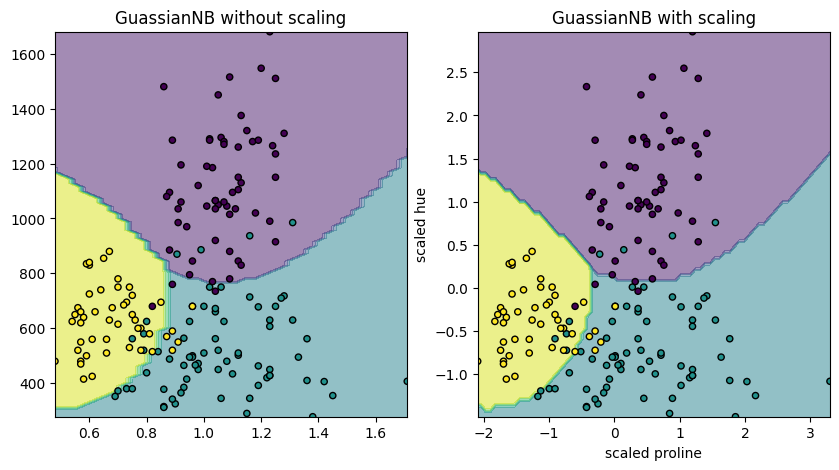

In [9]:
fig,(ax1,ax2) = subplots(ncols=2,figsize=(10,5))
fit_and_plot(x,y,clf,ax1)
ax1.set_title("GuassianNB without scaling")
fit_and_plot(x_scaled,y,clf,ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
ax2.set_title("GuassianNB with scaling")